# 量子状態トモグラフィー

- 1量子状態のトモグラフィー
    - |0>
    - |1>
    - |0> + |1>
    - |0> - |1>
- 2量子エンタングルメント状態のトモグラフィー

## 　密度演算子

$$
    \rho = \hat{I} + \sum_{i=1}^3 u_i \hat{\sigma}_i
$$

$$
    u_i = \frac{1}{2} \mathrm{Tr} \left( \sigma_i \rho \right)
$$

$$
    \rho = \frac{1}{2} \sum_{i=0}^3 \mathrm{Tr} \left( \sigma_i \rho \right) \sigma_i
$$

$\mathrm{Tr} \left( \sigma_i \rho \right)$は物理量$\sigma_i$の期待値であるので、つまりX・Y・Z測定それぞれの期待値で表せられるということ。  
$I$については測定はせずそのまま1にしておけば良い

In [3]:
from decimal import Decimal, ROUND_HALF_UP

from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

In [63]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import *
from qiskit.visualization import plot_histogram

### Z測定

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


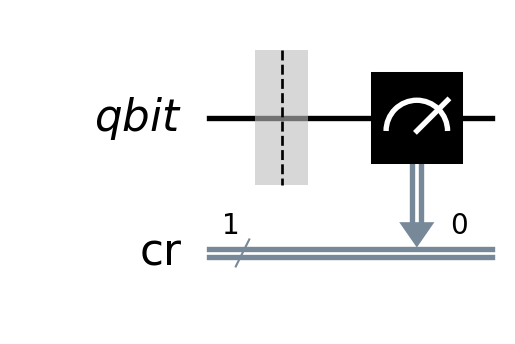

{'0': 1024}


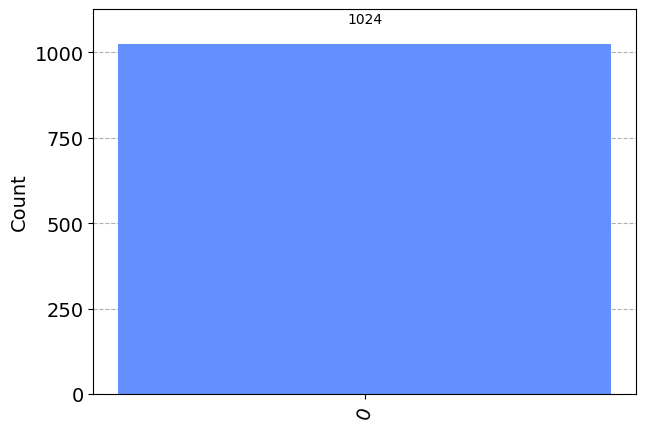

In [3]:
results = dict()

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')

qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.barrier(qbit)

qc.measure(qbit, cr[0])

fig, ax = plt.subplots(1, 1)
qc.draw(output='mpl', ax=ax)
plt.show()
plt.close()

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

### X測定

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


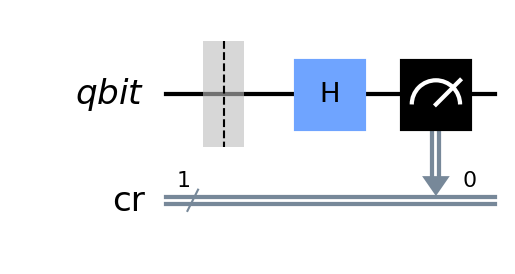

{'0': 496, '1': 528}


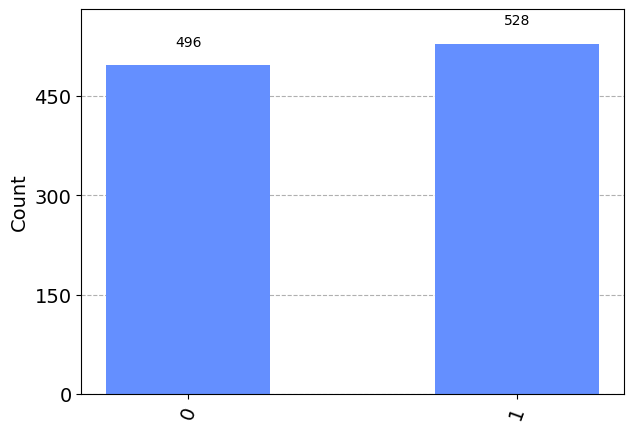

In [4]:
qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')

qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.barrier(qbit)

qc.h(qbit)
qc.measure(qbit, cr[0])

fig, ax = plt.subplots(1, 1)
qc.draw(output='mpl', ax=ax)
plt.show()
plt.close()

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

### Y測定

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


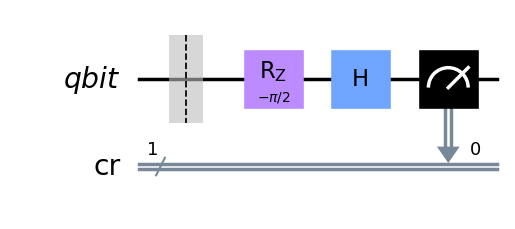

{'1': 505, '0': 519}


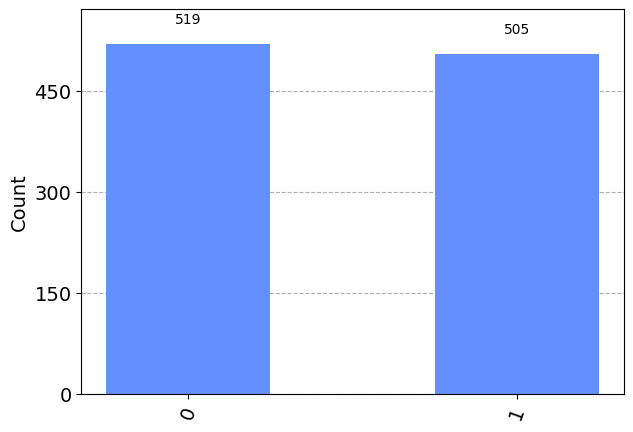

In [5]:
qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')

qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.barrier(qbit)

qc.rz(-np.pi / 2, qbit)
qc.h(qbit)
qc.measure(qbit, cr[0])

fig, ax = plt.subplots(1, 1)
qc.draw(output='mpl', ax=ax)
plt.show()
plt.close()

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
result = job.result()

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

In [6]:
results

{'Z': {'0': 1024}, 'X': {'0': 496, '1': 528}, 'Y': {'1': 505, '0': 519}}

In [7]:
density_tomographied = np.zeros([2, 2], dtype=complex)
for basis, result in results.items():
    print(f'basis: {basis}')
    print(f'result: {result}')
    probability_0 = result['0'] / sum(result.values()) if '0' in result.keys() else 0
    print(f'probability |0>: {probability_0}')
    probability_1 = result['1'] / sum(result.values()) if '1' in result.keys() else 0
    print(f'probability |1>: {probability_1}')
    exp_val = 1 * probability_0 - 1 * probability_1
    print(f'exp value: {exp_val}')

    if basis == 'X':
        pauli = np.asarray([[0, 1], [1, 0]])
    elif basis == 'Y':
        pauli = np.asarray([[0, -1j], [1j, 0]])
    elif basis == 'Z':
        pauli = np.asarray([[1, 0], [0, -1]])
    density_tomographied += exp_val * pauli
    print('-' * 100)

print('=' * 100)
density_tomographied += np.asarray([[1, 0], [0, 1]])
density_tomographied /= 2
print('estimated density')
print(density_tomographied)        

basis: Z
result: {'0': 1024}
probability |0>: 1.0
probability |1>: 0
exp value: 1.0
----------------------------------------------------------------------------------------------------
basis: X
result: {'0': 496, '1': 528}
probability |0>: 0.484375
probability |1>: 0.515625
exp value: -0.03125
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 505, '0': 519}
probability |0>: 0.5068359375
probability |1>: 0.4931640625
exp value: 0.013671875
----------------------------------------------------------------------------------------------------
estimated density
[[ 1.      +0.j         -0.015625-0.00683594j]
 [-0.015625+0.00683594j  0.      +0.j        ]]


In [8]:
density_expected = np.asarray([[1],[0]], dtype=complex).dot(np.asarray([[1],[0]], dtype=complex).T)
print(density_expected)

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


### Fidelity

$$
    F(\rho, \rho') = \left( \mathrm{Tr} \left[ \sqrt{\sqrt{\rho} \rho' \sqrt{\rho}} \right] \right)^2
$$

In [9]:
sqrt_expected = sp.linalg.sqrtm(density_expected)
print(sqrt_expected)

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [10]:
fidelity = (sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)).trace()) ** 2
print(f'fidelity: {fidelity}')

fidelity: (1+0j)


In [8]:
def draw_circuit(qc):
    fig, ax = plt.subplots(1, 1)
    qc.draw(output='mpl', ax=ax)
    plt.show()
    plt.close()


def execute_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=backend)
    result = job.result()
    return result


def z_measure(qc, qr, cr):
    qc.measure(qr, cr)


def x_measure(qc, qr, cr):
    qc.h(qr)
    qc.measure(qr, cr)


def y_measure(qc, qr, cr):
    qc.rz(-np.pi / 2, qr)
    qc.h(qr)
    qc.measure(qr, cr)


def single_qubit_tomography(results):
    density_tomographied = np.zeros([2, 2], dtype=complex)
    for basis, result in results.items():
        print(f'basis: {basis}')
        print(f'result: {result}')
        probability_0 = result['0'] / sum(result.values()) if '0' in result.keys() else 0
        print(f'probability |0>　 or |+> or |π＞: {probability_0}')
        probability_1 = result['1'] / sum(result.values()) if '1' in result.keys() else 0
        print(f'probability |1> or |-> or |-π>: {probability_1}')
        exp_val = 1 * probability_0 - 1 * probability_1
        print(f'exp value: {exp_val}')
    
        if basis == 'X':
            pauli = np.asarray([[0, 1], [1, 0]])
        elif basis == 'Y':
            pauli = np.asarray([[0, -1j], [1j, 0]])
        elif basis == 'Z':
            pauli = np.asarray([[1, 0], [0, -1]])
        density_tomographied += exp_val * pauli
        print('-' * 100)

    density_tomographied += np.asarray([[1, 0], [0, 1]])
    density_tomographied /= 2
    return density_tomographied


def create_density_matrix_from_statevector(state):
    return state.dot(state.T)


def calc_fidelity(density_expected, density_tomographied):
    sqrt_expected = sp.linalg.sqrtm(density_expected)
    print('期待する密度行列の平方根')
    print(sqrt_expected)

    # print(sqrt_expected)
    # print(sqrt_expected.dot(density_tomographied))
    # print(sqrt_expected.dot(density_tomographied).dot(sqrt_expected))
    # print(sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)))
    # print(sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)).trace())
    # print(abs((sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)).trace())))
    # print(abs((sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)).trace())) ** 2)
    fidelity = (sp.linalg.sqrtm(sqrt_expected.dot(density_tomographied).dot(sqrt_expected)).trace()) ** 2
    fidelity_real = Decimal(str(fidelity.real)).quantize(Decimal('0.01'), ROUND_HALF_UP)
    fidelity_imag = Decimal(str(fidelity.imag)).quantize(Decimal('0.01'), ROUND_HALF_UP)
    fidelity = float(fidelity_real) + float(fidelity_imag) * 1j
    return fidelity


$$
    F(\rho, \rho') = \left( \mathrm{Tr} \left[ \sqrt{\sqrt{\rho} \rho' \sqrt{\rho}} \right] \right)^2
$$

## |1>状態のトモグラフィー

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


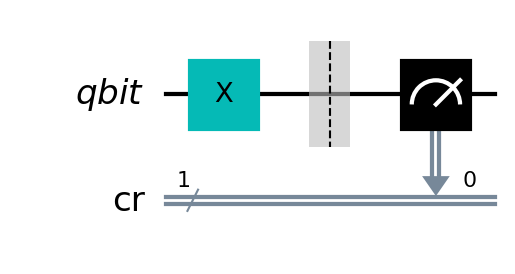

{'1': 1024}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


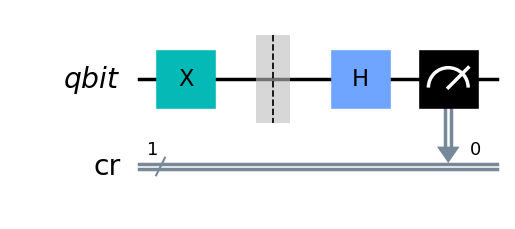

{'1': 504, '0': 520}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


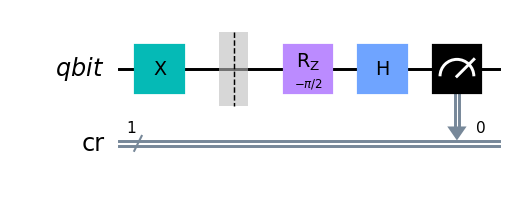

{'0': 525, '1': 499}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 1024}, 'X': {'1': 504, '0': 520}, 'Y': {'0': 525, '1': 499}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 1024}
probability |0>　 or |+> or |π＞: 0
probability |1> or |-> or |-π>: 1.0
exp value: -1.0
----------------------------------------------------------------------------------------------------
basis: X
result: {'1': 504, '0': 520}
probability |0>　 or |+> or |π＞: 0.5078125
probability |1> or |-> or |-π>: 0.4921875
exp value: 0.015625
----------------------------------------------------------------------------------------------------
basis: Y
result: {'0': 525, '1': 499}
probability |0>　 or |+> or |π＞: 0.5126953125
probability |1> or |-> or |-π>: 0.4873046875
exp value: 0.025390625
---------------------------------------------------------------------------------

In [9]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = np.asarray([[0],[1]], dtype=complex)

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


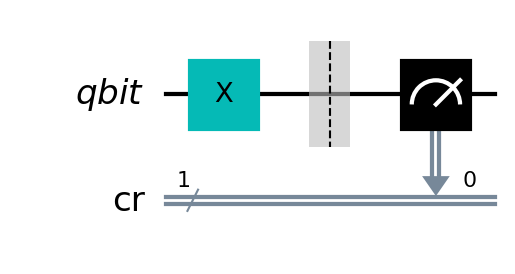

{'1': 1024}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


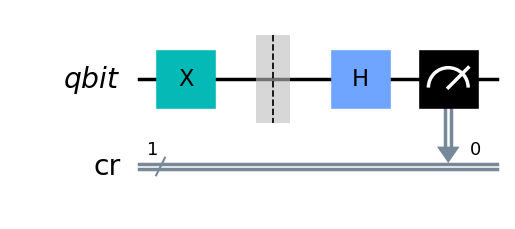

{'0': 501, '1': 523}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


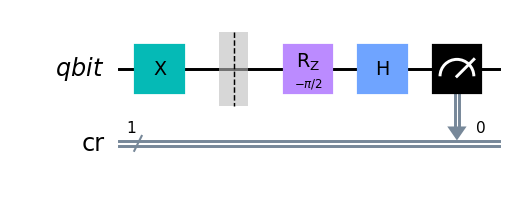

{'0': 527, '1': 497}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 1024}, 'X': {'0': 501, '1': 523}, 'Y': {'0': 527, '1': 497}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 1024}
probability |0>　 or |+> or |π＞: 0
probability |1> or |-> or |-π>: 1.0
exp value: -1.0
----------------------------------------------------------------------------------------------------
basis: X
result: {'0': 501, '1': 523}
probability |0>　 or |+> or |π＞: 0.4892578125
probability |1> or |-> or |-π>: 0.5107421875
exp value: -0.021484375
----------------------------------------------------------------------------------------------------
basis: Y
result: {'0': 527, '1': 497}
probability |0>　 or |+> or |π＞: 0.5146484375
probability |1> or |-> or |-π>: 0.4853515625
exp value: 0.029296875
-----------------------------------------------------------------------

In [13]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

qc.x(qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = np.asarray([[0],[1]], dtype=complex)

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

## |+>状態のトモグラフィー

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


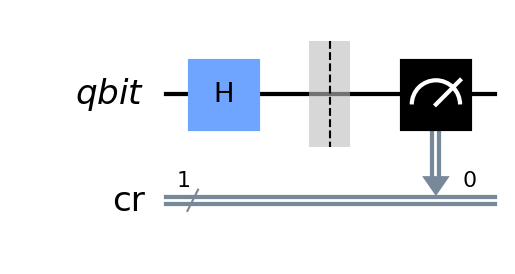

{'0': 506, '1': 518}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


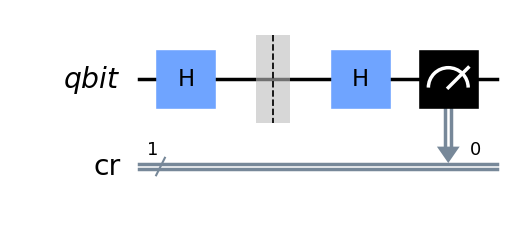

{'0': 1024}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


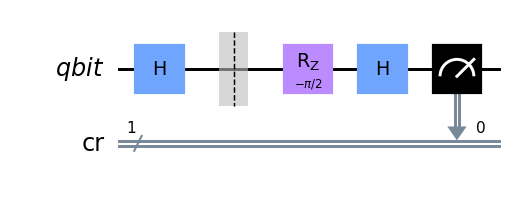

{'1': 515, '0': 509}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'0': 506, '1': 518}, 'X': {'0': 1024}, 'Y': {'1': 515, '0': 509}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'0': 506, '1': 518}
probability |0>　 or |+> or |π＞: 0.494140625
probability |1> or |-> or |-π>: 0.505859375
exp value: -0.01171875
----------------------------------------------------------------------------------------------------
basis: X
result: {'0': 1024}
probability |0>　 or |+> or |π＞: 1.0
probability |1> or |-> or |-π>: 0
exp value: 1.0
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 515, '0': 509}
probability |0>　 or |+> or |π＞: 0.4970703125
probability |1> or |-> or |-π>: 0.5029296875
exp value: -0.005859375
--------------------------------------------------------------------------

In [10]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.h(qbit)

def expect_state():
    state = (1 / np.sqrt(2)) * np.asarray([[1],[1]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


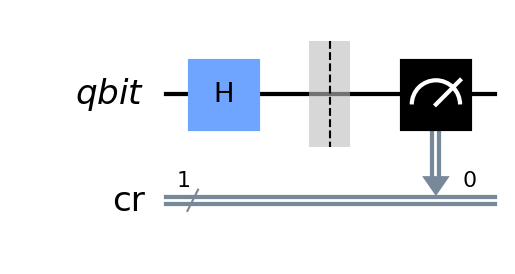

{'1': 516, '0': 508}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


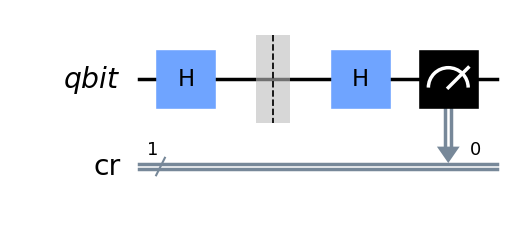

{'0': 1024}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


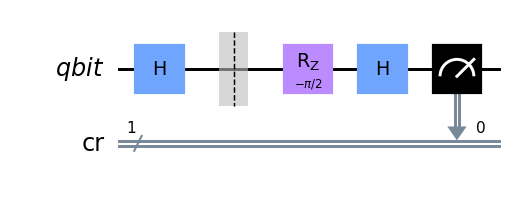

{'1': 542, '0': 482}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 516, '0': 508}, 'X': {'0': 1024}, 'Y': {'1': 542, '0': 482}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 516, '0': 508}
probability |0>　 or |+> or |π＞: 0.49609375
probability |1> or |-> or |-π>: 0.50390625
exp value: -0.0078125
----------------------------------------------------------------------------------------------------
basis: X
result: {'0': 1024}
probability |0>　 or |+> or |π＞: 1.0
probability |1> or |-> or |-π>: 0
exp value: 1.0
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 542, '0': 482}
probability |0>　 or |+> or |π＞: 0.470703125
probability |1> or |-> or |-π>: 0.529296875
exp value: -0.05859375
--------------------------------------------------------------------------------

In [15]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.h(qbit)

def expect_state():
    state = (1 / np.sqrt(2)) * np.asarray([[1],[1]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

- 理論としては推定した密度行列から、現実に存在する(任意の量子状態の)密度行列から最も近いものを選択して、それを新しい推定した密度行列としておきかえる。
- 実験としては誤差として切り捨ててもいいかも

## |->状態のトモグラフィー

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


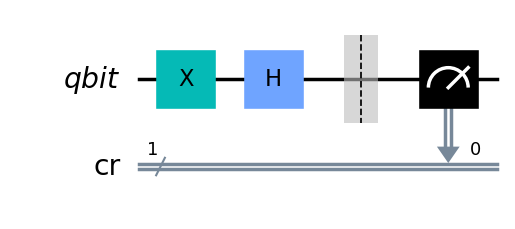

{'1': 489, '0': 535}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


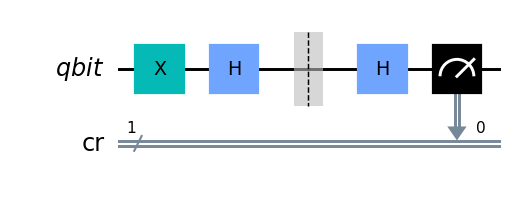

{'1': 1024}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


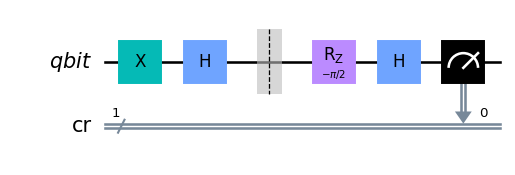

{'1': 514, '0': 510}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 489, '0': 535}, 'X': {'1': 1024}, 'Y': {'1': 514, '0': 510}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 489, '0': 535}
probability |0>　 or |+> or |π＞: 0.5224609375
probability |1> or |-> or |-π>: 0.4775390625
exp value: 0.044921875
----------------------------------------------------------------------------------------------------
basis: X
result: {'1': 1024}
probability |0>　 or |+> or |π＞: 0
probability |1> or |-> or |-π>: 1.0
exp value: -1.0
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 514, '0': 510}
probability |0>　 or |+> or |π＞: 0.498046875
probability |1> or |-> or |-π>: 0.501953125
exp value: -0.00390625
--------------------------------------------------------------------------

In [11]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.x(qbit)
    qc.h(qbit)

def expect_state():
    state = (1 / np.sqrt(2)) * np.asarray([[1],[-1]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

## ノイズがある場合

### |0>のつもりが|1>の場合

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


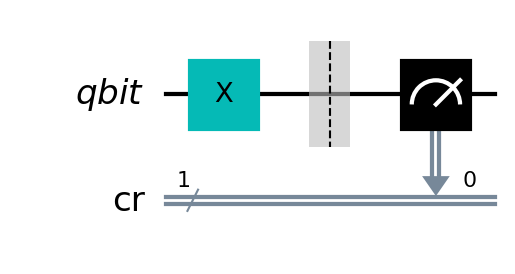

{'1': 1024}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


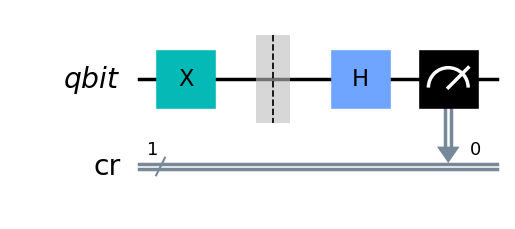

{'1': 498, '0': 526}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


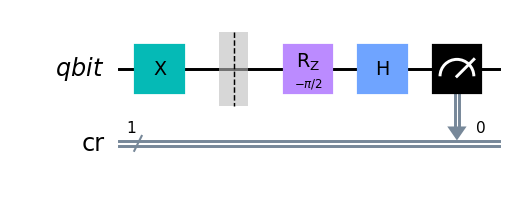

{'0': 498, '1': 526}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 1024}, 'X': {'1': 498, '0': 526}, 'Y': {'0': 498, '1': 526}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 1024}
probability |0>　 or |+> or |π＞: 0
probability |1> or |-> or |-π>: 1.0
exp value: -1.0
----------------------------------------------------------------------------------------------------
basis: X
result: {'1': 498, '0': 526}
probability |0>　 or |+> or |π＞: 0.513671875
probability |1> or |-> or |-π>: 0.486328125
exp value: 0.02734375
----------------------------------------------------------------------------------------------------
basis: Y
result: {'0': 498, '1': 526}
probability |0>　 or |+> or |π＞: 0.486328125
probability |1> or |-> or |-π>: 0.513671875
exp value: -0.02734375
-----------------------------------------------------------------------------

In [12]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.x(qbit)

def expect_state():
    state = np.asarray([[1],[0]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

### |0>のつもりが|+>の場合

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


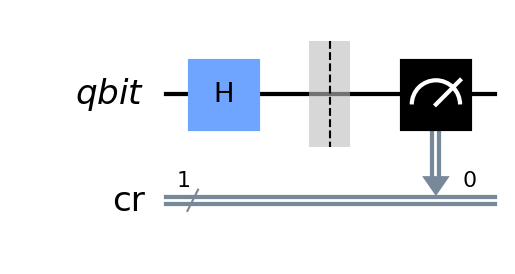

{'0': 523, '1': 501}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


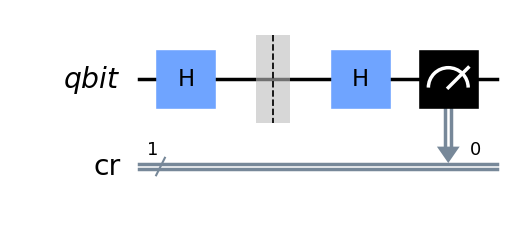

{'0': 1024}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


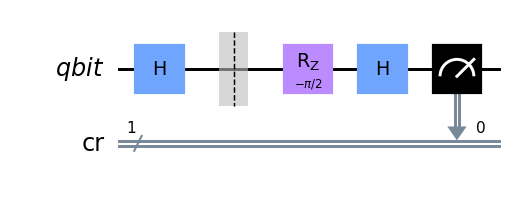

{'1': 530, '0': 494}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'0': 523, '1': 501}, 'X': {'0': 1024}, 'Y': {'1': 530, '0': 494}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'0': 523, '1': 501}
probability |0>　 or |+> or |π＞: 0.5107421875
probability |1> or |-> or |-π>: 0.4892578125
exp value: 0.021484375
----------------------------------------------------------------------------------------------------
basis: X
result: {'0': 1024}
probability |0>　 or |+> or |π＞: 1.0
probability |1> or |-> or |-π>: 0
exp value: 1.0
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 530, '0': 494}
probability |0>　 or |+> or |π＞: 0.482421875
probability |1> or |-> or |-π>: 0.517578125
exp value: -0.03515625
---------------------------------------------------------------------------

In [13]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.h(qbit)

def expect_state():
    state = np.asarray([[1],[0]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

直交してたらゼロ、ということらしい

### |0>のつもりがRxで回っている場合

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


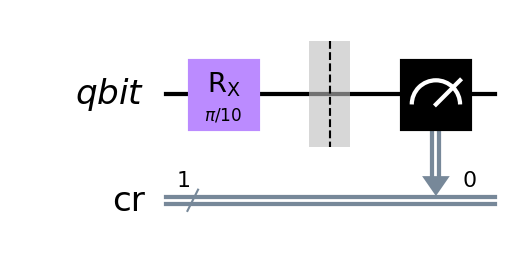

{'1': 20, '0': 1004}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


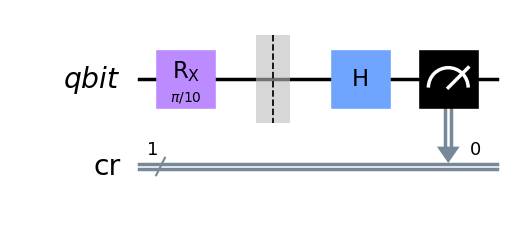

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


{'1': 521, '0': 503}
----------------------------------------------------------------------------------------------------
[Y測定]


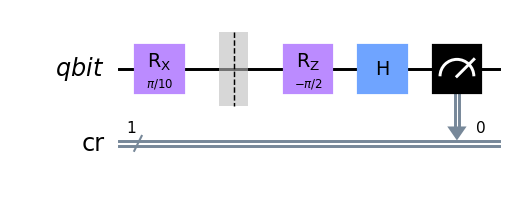

{'0': 351, '1': 673}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 20, '0': 1004}, 'X': {'1': 521, '0': 503}, 'Y': {'0': 351, '1': 673}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 20, '0': 1004}
probability |0>　 or |+> or |π＞: 0.98046875
probability |1> or |-> or |-π>: 0.01953125
exp value: 0.9609375
----------------------------------------------------------------------------------------------------
basis: X
result: {'1': 521, '0': 503}
probability |0>　 or |+> or |π＞: 0.4912109375
probability |1> or |-> or |-π>: 0.5087890625
exp value: -0.017578125
----------------------------------------------------------------------------------------------------
basis: Y
result: {'0': 351, '1': 673}
probability |0>　 or |+> or |π＞: 0.3427734375
probability |1> or |-> or |-π>: 0.6572265625
exp value: -0.314453125
-------------------------------

In [17]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.rx(0.1 * np.pi, qbit)

def expect_state():
    state = np.asarray([[1],[0]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')

### |0>のつもりがランダムに|1>の場合

In [76]:
def execute_error_circuit(qc):
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(pauli_error([('X', 0.1), ('I', 0.9)]), 'id')
    print(noise_model)
    backend = AerSimulator(noise_model=noise_model)
    qc_noise = transpile(qc, backend)
    result = backend.run(qc_noise).result()
    return result

[Z測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


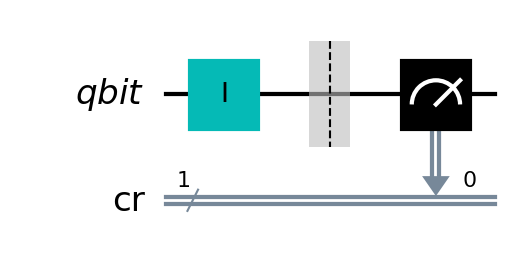

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  All-qubits errors: ['id']
{'1': 83, '0': 941}
----------------------------------------------------------------------------------------------------
[X測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


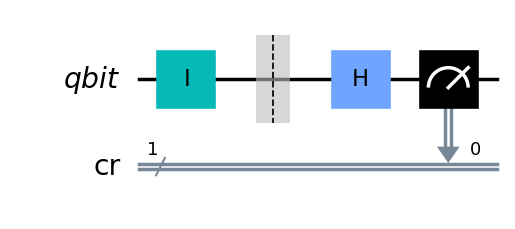

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  All-qubits errors: ['id']
{'1': 509, '0': 515}
----------------------------------------------------------------------------------------------------
[Y測定]


/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


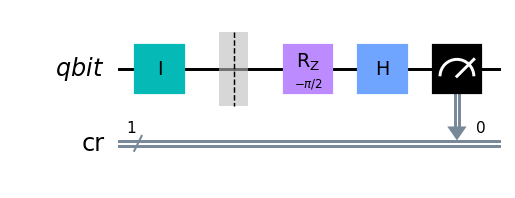

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['id']
  All-qubits errors: ['id']
{'1': 480, '0': 544}
----------------------------------------------------------------------------------------------------
測定結果
{'Z': {'1': 83, '0': 941}, 'X': {'1': 509, '0': 515}, 'Y': {'1': 480, '0': 544}}
----------------------------------------------------------------------------------------------------
トモグラフィー
basis: Z
result: {'1': 83, '0': 941}
probability |0>　 or |+> or |π＞: 0.9189453125
probability |1> or |-> or |-π>: 0.0810546875
exp value: 0.837890625
----------------------------------------------------------------------------------------------------
basis: X
result: {'1': 509, '0': 515}
probability |0>　 or |+> or |π＞: 0.5029296875
probability |1> or |-> or |-π>: 0.4970703125
exp value: 0.005859375
----------------------------------------------------------------------------------------------------
basis: Y
result: {'1': 480, '0': 544}
probability |0>　 or |+> or |

In [77]:
results = dict()

print('[Z測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='|+>')

def state_preparetion(qc, qbit):
    qc.id(qbit)

def expect_state():
    state = np.asarray([[1],[0]], dtype=complex)
    return state


state_preparetion(qc, qbit)
qc.barrier(qbit)
z_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_error_circuit(qc)

count = result.get_counts()
results['Z'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[X測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
x_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_error_circuit(qc)

count = result.get_counts()
results['X'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('[Y測定]')

qbit = QuantumRegister(1, name='qbit')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qbit, cr, name='Z-measure')

state_preparetion(qc, qbit)
qc.barrier(qbit)
y_measure(qc, qbit, cr[0])

draw_circuit(qc)

result = execute_error_circuit(qc)

count = result.get_counts()
results['Y'] = count
print(count)
plot_histogram(count)

print('-' * 100)

print('測定結果')
print(results)

print('-' * 100)

print('トモグラフィー')
density_tomographied = single_qubit_tomography(results)

print('estimated density')
print(density_tomographied)

print('-' * 100)

print('期待する密度行列')
state_expected = expect_state()

density_expected = create_density_matrix_from_statevector(state_expected)
print(density_expected)

print('-' * 100)
print('Fidelity')
fidelity = calc_fidelity(density_expected, density_tomographied)
print(f'fidelity: {fidelity}')